In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


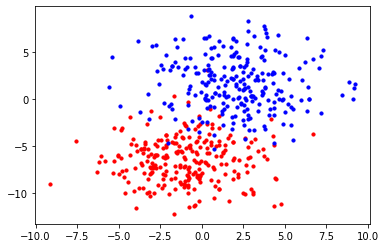

In [8]:

#Generating a dataset made of clusters to work on

centers = [(-1.0, -6.5), (2.0, 1.5)]
cluster_std = [2.5, 2.8]
#made it a bit overlapping otherwise the votes would go very close to one

X, y = make_blobs(n_samples=500, cluster_std=cluster_std, centers=centers, n_features=2,random_state=42)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", s=10, label="Cluster1")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", s=10, label="Cluster2")

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

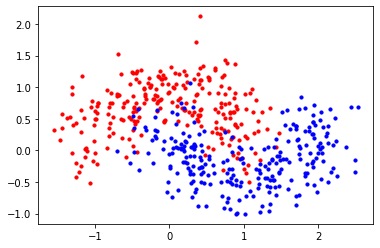

In [9]:
#moons dataset as per book
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=500, shuffle=False, noise=0.3, random_state=42)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", s=10, label="Cluster1")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", s=10, label="Cluster2")

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)

#enable soft voting w/probability=true on SVC

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(probability=True))])

LogisticRegression = 0.96
RandomForestClassifier = 0.95
SVC = 0.96
VotingClassifier = 0.96


NameError: name 'clf1' is not defined

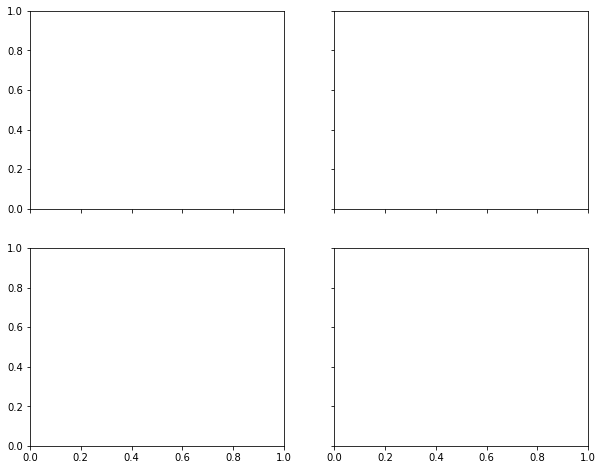

In [9]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__,"=", accuracy_score(y_test, y_pred))
#Can't seem to find an istance where the VotingClassiiers CLEARLY outperforms the others



In [ ]:
from itertools import product
f, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(10, 8))
for idx, clf, tt in zip(
    product([0, 1], [0, 1]),
    [log_clf, rnd_clf, svm_clf, voting_clf],
    ["Decision Tree (depth=4)", "KNN (k=7)", "Kernel SVM", "Soft Voting"],
):
    DecisionBoundaryDisplay.from_estimator(
        clf, X, alpha=0.4, ax=axarr[idx[0], idx[1]], response_method="predict"
    )
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

In [6]:
#BAGGING - auto soft vote
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
     max_samples=100, bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf, bag_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__,"=", accuracy_score(y_test, y_pred))

print("BaggingClassifier(oob) =",bag_clf.oob_score_) #close enough



LogisticRegression = 0.96
RandomForestClassifier = 0.95
SVC = 0.96
VotingClassifier = 0.96
BaggingClassifier = 0.95
BaggingClassifier(oob) = 0.955


In [27]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

print(rnd_clf.__class__.__name__,"=", accuracy_score(y_test, y_pred)) #close enough

#EQUIVALENT BCF:
# bag_clf_r = BaggingClassifier(
#     DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
#     n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)



RandomForestClassifier = 0.96


In [8]:
# feture importance measurments - please note that every run obviously returns slightly different results
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
     print(name, score)

sepal length (cm) 0.09885305933041297
sepal width (cm) 0.023549089690359095
petal length (cm) 0.43066213898664846
petal width (cm) 0.4469357119925794


In [9]:
#AdaBoost - PLEASE NOTE THIS STILL WORKS ON THE RANDOM CLUSTER AND NOT THE IRIS DATASET -> FIX
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train, y_train)

print(ada_clf.__class__.__name__,"=", accuracy_score(y_test, y_pred)) #close enough

AdaBoostClassifier = 0.95


In [10]:
#Gradient Boosted Regression Tree
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [11]:
#Second fit made on residual errors of the first
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2)

In [12]:
#Third made on second's residuals
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2)

In [14]:
y_pred = sum(tree.predict(X) for tree in (tree_reg1, tree_reg2, tree_reg3))


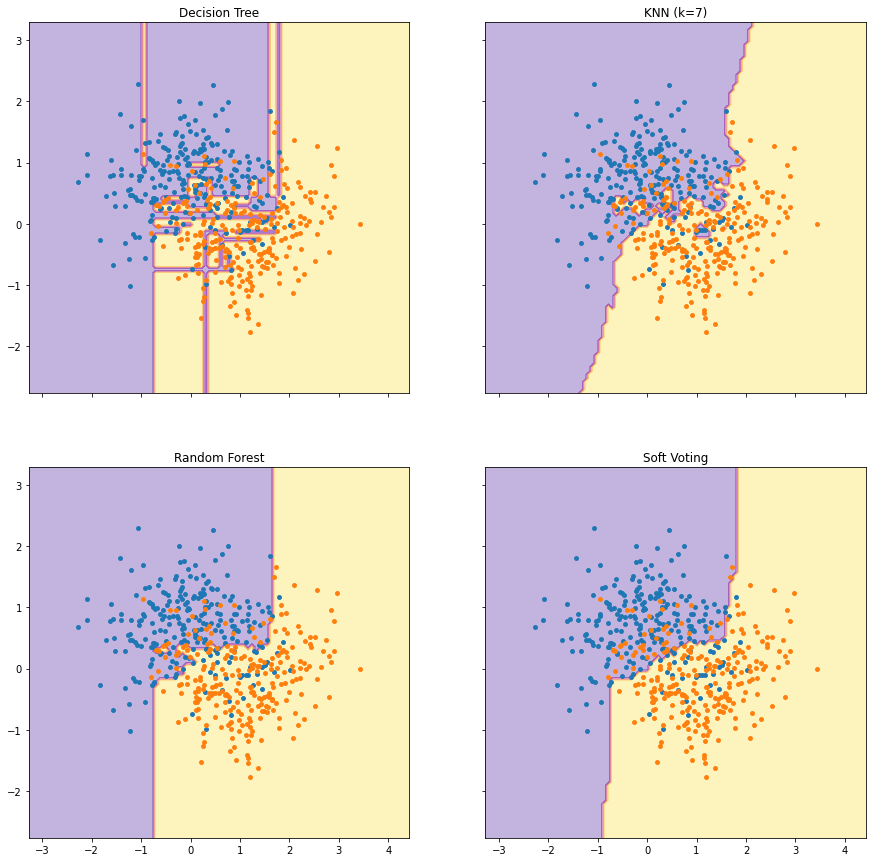

In [112]:
from itertools import product

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import DecisionBoundaryDisplay

# Loading some example data
X,y = make_moons(n_samples=500, shuffle=True, noise=.5, random_state=42)

# Training classifiers
tree_clf = DecisionTreeClassifier()
knn_clf = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma=0.1, kernel="rbf", probability=True)
eclf = VotingClassifier(
    estimators=[("dt", clf1), ("knn", clf2), ("svc", clf3)],
    voting="soft",
    weights=[2, 1, 2],
)

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)


tree_clf.fit(X, y)
knn_clf.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)
rnd_clf.fit(X, y)

# Plotting decision regions
f, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(15, 15))
for idx, clf, tt in zip(
    product([0,1], [0, 1]), #basically sets the view order
    [tree_clf, knn_clf, rnd_clf, eclf],
    ["Decision Tree", "KNN (k=7)", "Random Forest", "Soft Voting"],
):
    DecisionBoundaryDisplay.from_estimator(
        clf, X, alpha=0.3, ax=axarr[idx[0], idx[1]], response_method="predict", cmap="plasma"
    )
    
    #axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=15)
    axarr[idx[0], idx[1]].scatter(X[y == 0, 0], X[y == 0, 1], cmap="plasma",alpha=1, s=15)
    axarr[idx[0], idx[1]].scatter(X[y == 1, 0], X[y == 1, 1], cmap="plasma",alpha=1, s=15)
    axarr[idx[0], idx[1]].set_title(tt)

    
plt.show()

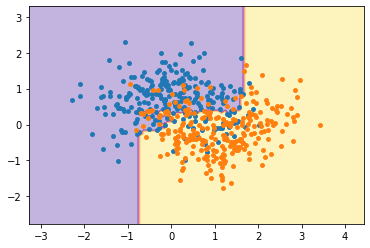

In [192]:
#a bit cleaner i guess

def boundary_decision_graph(classifier, data):
    DecisionBoundaryDisplay.from_estimator(
            classifier, data, alpha=0.3, response_method="predict", cmap="plasma"
        )

    plt.scatter(X[y == 0, 0], X[y == 0, 1], cmap="plasma",alpha=1, s=15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], cmap="plasma",alpha=1, s=15)

    plt.show()

boundary_decision_graph(rnd_clf,X)


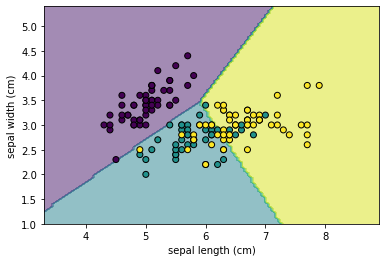

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay
iris = load_iris()
X = iris.data[:, :2]
classifier = LogisticRegression().fit(X, iris.target)
disp = DecisionBoundaryDisplay.from_estimator(
     classifier, X, response_method="predict",
     xlabel=iris.feature_names[0], ylabel=iris.feature_names[1],
     alpha=0.5,
 )
disp.ax_.scatter(X[:, 0], X[:, 1], c=iris.target, edgecolor="k")

plt.show()

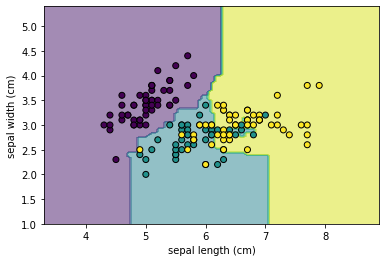

RandomForestClassifier = 0.9


0.31622776601683794

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.inspection import DecisionBoundaryDisplay


iris = load_iris()
X = iris.data[:, :2]#just two features
X_train, X_test, y_train, y_test = train_test_split(X,iris.target, test_size=0.2, random_state=42)

classifier = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1).fit(X, iris.target)
disp = DecisionBoundaryDisplay.from_estimator(
     classifier, X, response_method="predict",
     xlabel=iris.feature_names[0], ylabel=iris.feature_names[1],
     alpha=0.5,
 )
disp.ax_.scatter(X[:, 0], X[:, 1], c=iris.target, edgecolor="k")

plt.show()

y_pred = classifier.predict(X_test)
print(classifier.__class__.__name__,"=", accuracy_score(y_test, y_pred)) #close enough
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse